# Homework 2 (Due Thursday Dec 1, 6:29pm PST)

Please submit as a notebook in the format `HW2_FIRSTNAME_LASTNAME_USCID.ipynb` in a group chat to me and the TAs.

Your `USCID` is your student 10-digit ID.

### Part I.  Topic Modelling and Analysis (5pts)

Pick from **one** of the dataset options below:
* **Negative McDonalds Yelp reviews**: `datasets/mcdonalds-yelp-negative-reviews.csv`
* **[Top 5000 Udemy courses](https://www.kaggle.com/datasets/90eededa5561eee7f62c0e68ecdad14c2bdb58bc923834067025dee655a6083e?resource=download)** - a Kaggle dataset of the course descriptions of the top 5000 Udemy courses in 2022: `datasets/top5000_udemy.csv`

In your notebook, explore the data and perform topic modelling. You may use any vectorization or text preprocessing techniques we have discussed.

In order to earn full credit, you must:

* Show the **# of topics you tried, and explain why you ultimately decided on the final #**.
* Demonstrate **adequate text preprocessing (there are likely obvious stopwords / fuzzy matching / regex groupings that can be done to improve the final results)** - show what you tried.
* In 2-3 sentences: A **business analysis of these topics - what do they reveal as actionable next steps or insights for McDonalds or Udemy?** Please be specific in your recommendations/insights.
    - **Not specific**: *We recommend Amazon look into the quality of their toys, since the reviews show disatisfaction with the value of their product.*
    - **Specific**: *Amazon should explore more durable batteries/hardwares. For example, X% of reviews mention that the toys' batteries were broken or immediately died. This is part of a larger theme of components not being ready to use out the box, which often leads to disappointment on holiday occasions when children open up their gifts. See the following document snippets as examples:...*

#### 1. Loading Data 

In [292]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
reviews = pd.read_csv("../datasets/mcdonalds-yelp-negative-reviews.csv", encoding='latin-1')
text = reviews["review"].values

### 2. Data Cleaning and Text Preprocessing

In [293]:
# Clean out the different ways of saying mcdonalds to a standard form 


# Clean out the different ways of saying drive through to a standard form 



In [294]:
reviews['reviews_processed'] = reviews['review']

# Remove punctuation
from textacy.preprocessing.remove import punctuation
reviews['reviews_processed'] = reviews['reviews_processed'].apply(punctuation)

# Convert to lowercase 
reviews['reviews_processed'] = reviews['reviews_processed'].map(lambda x: x.lower())

# Replace common entities/concepts 
from textacy.preprocessing.replace import urls, hashtags, numbers, emails, emojis, currency_symbols
reviews['reviews_processed'] = reviews['reviews_processed'].\
 apply(urls).\
 apply(hashtags).\
 apply(currency_symbols).\
 apply(emojis).\
 apply(emails)
# apply(numbers)
# we won't remove numbers because it gives us valuable information 

# Remove or normalize undesired text elements 
#from collections import Counter
#from textacy.preprocessing.normalize import quotation_marks, bullet_points
#quotes = ['"','“','”']

reviews.head(10)


,_unit_id,city,review,reviews_processed
0,679455653,Atlanta,"I'm not a huge mcds lover, but I've been to better ones. This is by far the worst one I've ever been too! It's filthy inside and if you get drive through they completely screw up your order every time! The staff is terribly unfriendly and nobody seems to care.",i m not a huge mcds lover but i ve been to better ones this is by far the worst one i ve ever been too it s filthy inside and if you get drive through they completely screw up your order every time the staff is terribly unfriendly and nobody seems to care
1,679455654,Atlanta,"Terrible customer service. I came in at 9:30pm and stood in front of the register and no one bothered to say anything or help me for 5 minutes. There was no one else waiting for their food inside either, just outside at the window. I left and went to Chickfila next door and was greeted before I was all the way inside. This McDonalds is also dirty, the floor was covered with dropped food. Obviously filled with surly and unhappy workers.",terrible customer service i came in at 9 30pm and stood in front of the register and no one bothered to say anything or help me for 5 minutes there was no one else waiting for their food inside either just outside at the window i left and went to chickfila next door and was greeted before i was all the way inside this mcdonalds is also dirty the floor was covered with dropped food obviously filled with surly and unhappy workers
2,679455655,Atlanta,"First they ""lost"" my order, actually they gave it to someone one else than took 20 minutes to figure out why I was still waiting for my order.They after I was asked what I needed I replied, ""my order"".They asked for my ticket and the asst mgr looked at the ticket then incompletely filled it.I had to ask her to check to see if she filled it correctly.She acted as if she couldn't be bothered with that so I asked her again.She begrudgingly checked to she did in fact miss something on the ticket.So after 22 minutes I finally had my breakfast biscuit platter.As I left an woman approached and identified herself as the manager, she was dressed as if she had just awoken in an old t-shirt and sweat pants.She said she had heard what happened and said she'd take care of it.Well why didn't she intervene when she saw I was growing annoyed with the incompetence?",first they lost my order actually they gave it to someone one else than took 20 minutes to figure out why i was still waiting for my order they after i was asked what i needed i replied my order they asked for my ticket and the asst mgr looked at the ticket then incompletely filled it i had to ask her to check to see if she filled it correctly she acted as if she couldn t be bothered with that so i asked her again she begrudgingly checked to she did in fact miss something on the ticket so after 22 minutes i finally had my breakfast biscuit platter as i left an woman approached and identified herself as the manager she was dressed as if she had just awoken in an old t shirt and sweat pants she said she had heard what happened and said she d take care of it well why didn t she intervene when she saw i was growing annoyed with the incompetence
3,679455656,Atlanta,I see I'm not the only one giving 1 star. Only because there is not a -25 Star!!! That's all I need to say!,i see i m not the only one giving 1 star only because there is not a 25 star that s all i need to say
4,679455657,Atlanta,"Well, it's McDonald's, so you know what the food is. This review reflects solely on the poor service. I have been to this location countless times over the years. They consistently fail on the service end of things. The order takers tend to be rude, no smiles, and a lot of ""sighs"" and ""lip smacking"" when you talk to them. So why go back you ask? This store benefits from being the only place to eat in this area. The next stop is at least 12 minutes away on the other side of town. Also I strongly believe in 2nd chances and know 

In [295]:
# Lemmatization 
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

lemmatizer = WordNetLemmatizer()

# function to convert nltk tag to wordnet tag
def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:          
        return None


# Shoutout to this git repo for providing this code 
# https://gist.github.com/gaurav5430/9fce93759eb2f6b1697883c3782f30de
def lemmatize_sentence(sentence):
    #tokenize the sentence and find the POS tag for each token
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))  
    #tuple of (token, wordnet_tag)
    wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    lemmatized_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            #if there is no available tag, append the token as is
            lemmatized_sentence.append(word)
        else:        
            #else use the tag to lemmatize the token
            lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
    return " ".join(lemmatized_sentence)

reviews['reviews_processed'] = reviews['reviews_processed'].apply(lemmatize_sentence)

In [296]:
pd.set_option('display.max_colwidth', None)

#### Exploratory Data Analysis

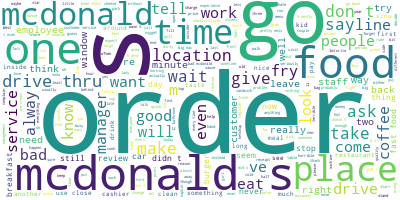

In [297]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(reviews['reviews_processed'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
# We are using the word cloud to figure out which extra stopwords to add to our stopword bank 
wordcloud.to_image()

In [298]:


# Add words to the stopwords 
# worst, worst ever, awful, terrible, bad, terrible, look like, mcdonalds, fast food, location, don't, want, review  

In [299]:
# Removing stopwords using gensim 
from gensim.parsing.preprocessing import remove_stopwords
from gensim.parsing.preprocessing import STOPWORDS

all_stopwords_gensim = STOPWORDS.union(set(['mcdonald', 'look like', 'location', 's']))

reviews['reviews_processed'] = reviews['reviews_processed'].apply(remove_stopwords)
reviews[['review',"reviews_processed"]].head(10)

# Add custom stopwords to improve our result 
# Credit to this stackoverflow page: 
# https://stackoverflow.com/questions/26826002/adding-words-to-stop-words-list-in-tfidfvectorizer-in-sklearn
from nltk.corpus import stopwords
stop = list(stopwords.words('english'))
stop.extend('fast food look like mcdonald mcdonalds bad'.split())


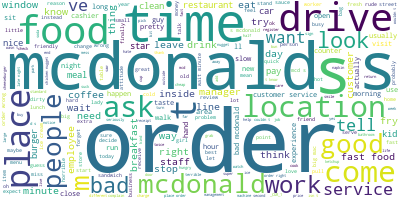

In [300]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(reviews['reviews_processed'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
# We are using the word cloud to figure out which extra stopwords to add to our stopword bank 
wordcloud.to_image()

In [301]:
# Vectorize the corpus 
from sklearn.decomposition import NMF
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(ngram_range=(3,3), min_df=3,
                            max_df=0.4, stop_words=set(stop))

X, terms = vectorizer.fit_transform(reviews['reviews_processed']), vectorizer.get_feature_names_out()
tf_idf = pd.DataFrame(X.toarray(), columns=terms)

print(f"TF-IDF: {tf_idf.shape}")
tf_idf.head(5)

TF-IDF: (1525, 162)


,10 minute fry,10 minute later,10 minute line,10 minute order,10 piece chicken,10 piece nugget,15 minute drive,15 minute later,15 minute order,15 minute wait,...,wait long line,wait wait wait,want chicken nugget,want ice cream,window ask order,window hand drink,wish negative star,work customer service,work drive order,worst customer service
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [314]:
# Fit the NMF Model
nmf = NMF(n_components=3)
W = nmf.fit_transform(X)
H = nmf.components_
print(f"Original shape of X is {X.shape}")
print(f"Decomposed W matrix is {W.shape}")
print(f"Decomposed H matrix is {H.shape}")

Original shape of X is (87, 18)
Decomposed W matrix is (87, 3)
Decomposed H matrix is (3, 18)


In [315]:
from typing import List
import numpy as np
# Report Results 
def get_top_tf_idf_tokens_for_topic(H: np.array, feature_names: List[str], num_top_tokens: int = 5):
  """
  Uses the H matrix (K components x M original features) to identify for each
  topic the most frequent tokens.
  """
  for topic, vector in enumerate(H):
    print(f"TOPIC {topic}\n")
    total = vector.sum()
    top_scores = vector.argsort()[::-1][:num_top_tokens]
    token_names = list(map(lambda idx: feature_names[idx], top_scores))
    strengths = list(map(lambda idx: vector[idx] / total, top_scores))
    
    for strength, token_name in zip(strengths, token_names):
      print(f"\b{token_name} ({round(strength * 100, 1)}%)\n")
    print(f"=" * 50)

get_top_tf_idf_tokens_for_topic(H, tf_idf.columns.tolist(), 3)

TOPIC 0

customer service (81.2%)

speak english (5.7%)

order wrong (5.5%)

TOPIC 1

place order (68.6%)

30 minute (13.7%)

open 24 (7.6%)

TOPIC 2

good service (65.8%)

order wrong (13.3%)

drive order (11.3%)



In [318]:
from sklearn.decomposition import LatentDirichletAllocation

lda = LatentDirichletAllocation(n_components=3)
W = lda.fit_transform(X)
H = lda.components_
get_top_tf_idf_tokens_for_topic(H, tf_idf.columns.tolist(), 3)

TOPIC 0

place order (26.0%)

good service (17.6%)

line drive (11.0%)

TOPIC 1

late night (18.0%)

24 hour (13.7%)

chicken sandwich (11.8%)

TOPIC 2

customer service (28.1%)

ice cream (14.3%)

order wrong (12.1%)



In [304]:
# We want to look at top topics for each city to give more targeted recommendations 
# Replace rows with missing cities with "Missing City"
reviews['city'].fillna('Missing City', inplace = True)

# Save a list of cities in our dataset for for loop later 
city_list = list(reviews['city'].unique())
city_list

['Atlanta',
 'Las Vegas',
 'Dallas',
 'Portland',
 'Chicago',
 'Cleveland',
 'Houston',
 'Los Angeles',
 'New York',
 'Missing City']

In [305]:
import warnings
warnings.filterwarnings("ignore")

vectorizer = TfidfVectorizer(ngram_range=(2,3), min_df=3,
                            max_df=0.4, stop_words=set(stop))

# Breakdown by city using NMF

for city in city_list:
    print(city)
    reviews_city = reviews[reviews['city']==city]
    X, terms = vectorizer.fit_transform(reviews_city['reviews_processed']), vectorizer.get_feature_names_out()
    tf_idf = pd.DataFrame(X.toarray(), columns=terms)
    nmf = NMF(n_components=3)
    W = nmf.fit_transform(X)
    H = nmf.components_
    get_top_tf_idf_tokens_for_topic(H, tf_idf.columns.tolist(), 3)

    

Atlanta
TOPIC 0

customer service (24.0%)

place order (11.1%)

order drive (10.1%)

TOPIC 1

order wrong (19.7%)

northside hospital (18.6%)

10 minute (10.1%)

TOPIC 2

ice cream (55.2%)

particular location (19.7%)

staff super (19.7%)

Las Vegas
TOPIC 0

customer service (17.3%)

service quick (2.8%)

late night (2.8%)

TOPIC 1

big mac (16.3%)

order big (3.9%)

order wrong (3.7%)

TOPIC 2

order right (17.3%)

hash brown (3.7%)

chicken nugget (3.2%)

Dallas
TOPIC 0

customer service (65.1%)

play area (9.8%)

big mac (9.7%)

TOPIC 1

parking lot (82.3%)

tell want (10.6%)

drive order (2.7%)

TOPIC 2

15 minute (100.0%)

order wrong (0.0%)

order right (0.0%)

Portland
TOPIC 0

24 hour (85.7%)

big mac (13.7%)

chicken nugget (0.6%)

TOPIC 1

time order (28.8%)

chicken sandwich (10.3%)

big mac (9.8%)

TOPIC 2

customer service (54.0%)

mess order (23.0%)

time visit (16.2%)

Chicago
TOPIC 0

parking lot (49.2%)

sweet tea (4.9%)

drive li

In [ ]:
# Breakdown by city using LDA 
vectorizer = TfidfVectorizer(ngram_range=(2,3), min_df=3,
                            max_df=0.4, stop_words=set(stop))

for city in city_list:
    print(city)
    reviews_city = reviews[reviews['city']==city]
    X, terms = vectorizer.fit_transform(reviews_city['reviews_processed']), vectorizer.get_feature_names_out()
    tf_idf = pd.DataFrame(X.toarray(), columns=terms)
    lda = LatentDirichletAllocation(n_components=3)
    W = lda.fit_transform(X)
    H = lda.components_
    get_top_tf_idf_tokens_for_topic(H, tf_idf.columns.tolist(), 3)

In [306]:
import numpy as np
def get_top_documents_for_each_topic(W: np.array, documents: List[str], num_docs: int = 5):
    sorted_docs = W.argsort(axis=0)[::-1]
    top_docs = sorted_docs[:num_docs].T
    per_document_totals = W.sum(axis=1)
    for topic, top_documents_for_topic in enumerate(top_docs):
        print(f"Topic {topic}")
        for doc in top_documents_for_topic:
            score = W[doc][topic]
            percent_about_topic = round(score / per_document_totals[doc] * 100, 1)
            print(f"{percent_about_topic}%", documents[doc])
            print("=" * 50)

In [307]:
get_top_documents_for_each_topic(W, reviews['review'].tolist())

Topic 0
100.0% I'm not a huge mcds lover, but I've been to better ones. This is by far the worst one I've ever been too! It's filthy inside and if you get drive through they completely screw up your order every time! The staff is terribly unfriendly and nobody seems to care.
100.0% Other businesses throughout Metro Atlanta opened their doors to stranded motorists during the Jan. 2014 snow storm. This McDonald's on Camp Creek Parkway told a group of senior citizens who were on the way home from an outing that they had to leave their restaurant. All they cared about was the dollar. After they got that, they were done with them. Too bad they couldn't have made it down the street to Wendy's or Chic Fil A and other restaurants.
100.0% BEWARE! I saw the manager filling orders for drive-thru customers using bare hands - no gloves or utensils to pack fries - and this is the weirdest thing ever: she was 'fingering' plastic cup lids!?! Don't know what else to call it! She poked her finger throug

In [317]:
from sklearn.decomposition import LatentDirichletAllocation

lda = LatentDirichletAllocation(n_components=3)
W = lda.fit_transform(X)
H = lda.components_
get_top_tf_idf_tokens_for_topic(H, tf_idf.columns.tolist(), 3)

TOPIC 0

speak english (14.7%)

24 hour (14.0%)

open 24 (12.9%)

TOPIC 1

customer service (26.2%)

place order (25.6%)

line drive (10.8%)

TOPIC 2

good service (18.6%)

late night (14.5%)

ice cream (14.5%)



In [309]:
get_top_documents_for_each_topic(W, reviews['review'].tolist())

Topic 0
75.5% Just sat at drive thru several minutes no one is answering. I can see employees walking around and it is 5:48 am and they should be open. I wonder if this franchises owner is aware that he is losing business due to this. I bet they do and dont care.
75.4% The customer service was HORRIBLE! They seemed angry to work here and they would get upset if you ask for more ketchup or condiments. Also, the kids play area was filthy. It had old dirty food on the floor and it was full of lint. Stay away from this location.
73.4% I've gone to this McDonald's several times and they've gotten my order completely wrong. I go there before work around 7:30 so I'm very hungry and I order a bacon egg and cheese biscuit... Once I get to work I find what is in my bag is actually an egg mcmuffin...I absolutely hate those..so of course it's too late for me to drive back and get my correct order. I dont expect this to happen and its a elveru bisy mcdonalds so i dont stop at the srive thru to chec

In [310]:
for city in city_list:
    print(city)
    reviews_city = reviews[reviews['city']==city]
    X, terms = vectorizer.fit_transform(reviews_city['reviews_processed']), vectorizer.get_feature_names_out()
    tf_idf = pd.DataFrame(X.toarray(), columns=terms)
    nmf = NMF(n_components=3)
    W = nmf.fit_transform(X)
    H = nmf.components_
    get_top_documents_for_each_topic(W, reviews['review'].tolist())

Atlanta
Topic 0
99.2% Customer service is well below par here. I placed my order through the intercom and was told that I'd have to pay in separate transactions if I were to use more than 1 coupon. I expected that and was fine with it up until I got to the window in which one of the girls working the cashier had a problem with me using the coupons and I quote, mentioned, "I don't give a d*** and a f*** what she wants." I never make it a goal to be difficult to other people and I find it very rude, let alone unnecessary, that I received this treatment. It is part of your job's duties to simply put in a customer's order. If you don't like your job, you have no business being there, and there are plenty of job seekers out there who would be more deserving of your position. To top it off, after I left the restaurant, I opened my bag to find out that I didn't receive everything I ordered and paid for.
100.0% Food is what you would expect from McDonald's but the management and staff could us

### Part II. Emotion Classification (5 pts)

Use the `datasets/emotions_dataset.zip` (see the original Dataset source on [Kaggle](https://www.kaggle.com/datasets/praveengovi/emotions-dataset-for-nlp)) to build a classification model that predicts the emotion of sentence. If you would like, you may classify only the top 4 emotions, and group all other classes as `Other`. 

In order to earn full credit, you must:

* Show the performance of your model with `CountVectorizer`, `TfIdfVectorizer`, `word2vec`, and `glove` embeddings.
    - for `word2vec`, make sure not to use the `en_core_web_sm` dataset (these are not real embeddings)
* Perform text preprocessing (or explain why it was not necessary):
    - stopword removal
    - ngram tokenization
    - stemming/lemmatization
    - fuzzy matching / regex cleaning / etc. (as you deem necessary, but show that you analyzed the text to make your decision)
* Show **AUROC / F1 scores** for on the holdout (test + validation) datasets.
* A brief discussion (2-3 sentences) of what could improve your model and why.

### 1. Importing Datasets 

In [311]:
train_df = pd.read_csv('../datasets/emotions/train.txt',header=None, names=['text'])
train_df[['text','emotion']] = train_df['text'].str.split(';',expand=True)
train_df['type'] = "train"
test_df = pd.read_csv('../datasets/emotions/test.txt',header=None, names=['text'])
test_df[['text','emotion']] = test_df['text'].str.split(';',expand=True)
test_df['type'] = "test"
val_df = pd.read_csv('../datasets/emotions/val.txt',header=None, names=['text'])
val_df[['text','emotion']] = val_df['text'].str.split(';',expand=True)
val_df['type'] = "val"

df = train_df.append(test_df.append(val_df , ignore_index=True) , ignore_index=True)

df.head()

,text,emotion,type
0,i didnt feel humiliated,sadness,train
1,i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake,sadness,train
2,im grabbing a minute to post i feel greedy wrong,anger,train
3,i am ever feeling nostalgic about the fireplace i will know that it is still on the property,love,train
4,i am feeling grouchy,anger,train


In [312]:
# Checking if all the data have been appended correctly
print(train_df.shape)
print(test_df.shape)
print(val_df.shape)
print(df.shape)

print(df['type'].unique())

(16000, 3)
(2000, 3)
(2000, 3)
(20000, 3)
['train' 'test' 'val']


### 2. Text Preprocessing


In [313]:
# Removing stopwords using gensim 
from gensim.parsing.preprocessing import remove_stopwords
df['text_clean'] = df['text'].apply(remove_stopwords)
df.head(10)

,text,emotion,type,text_clean
0,i didnt feel humiliated,sadness,train,didnt feel humiliated
1,i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake,sadness,train,feeling hopeless damned hopeful cares awake
2,im grabbing a minute to post i feel greedy wrong,anger,train,im grabbing minute post feel greedy wrong
3,i am ever feeling nostalgic about the fireplace i will know that it is still on the property,love,train,feeling nostalgic fireplace know property
4,i am feeling grouchy,anger,train,feeling grouchy
5,ive been feeling a little burdened lately wasnt sure why that was,sadness,train,ive feeling little burdened lately wasnt sure
6,ive been taking or milligrams or times recommended amount and ive fallen asleep a lot faster but i also feel like so funny,surprise,train,ive taking milligrams times recommended ive fallen asleep lot faster feel like funny
7,i feel as confused about life as a teenager or as jaded as a year old man,fear,train,feel confused life teenager jaded year old man
8,i have been with petronas for years i feel that petronas has performed well and made a huge profit,joy,train,petronas years feel petronas performed huge profit
9,i feel romantic too,love,train,feel romantic
